In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
from sklearn.model_selection import train_test_split
X, y = mnist["data"].values, mnist["target"].apply(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)

In [3]:
X_train.shape

(35000, 784)

In [4]:
y_train.shape

(35000,)

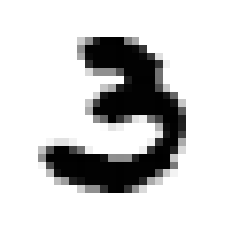

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

digit = X_train[1000].reshape(28, 28)
plt.imshow(digit, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

pipeline = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=10))])

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=10))])

In [16]:
pipeline.predict([X_train[1000]])

array([3])

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(clf, X_test=X_test, y_test=y_test):
    y_hat = clf.predict(X_test)
    a = accuracy_score(y_test, y_hat)
    p = precision_score(y_test, y_hat, average="weighted")
    r = recall_score(y_test, y_hat, average="weighted")
    f1 = f1_score(y_test, y_hat, average="weighted")
    return {"acc": a, "precision": p, "recall": r, "f1": f1}

In [18]:
evaluate(pipeline)

{'acc': 0.9332,
 'precision': 0.933598677645574,
 'recall': 0.9332,
 'f1': 0.9329878089365625}